In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
#import ipyplot

# Functions

In [ ]:
def probs(n=0, nthresh=500):
    '''
    in this example, the probability of clicking each ad changes with time
    n is the counter/round for when the ad is being shown
    preferences change by a small amount epsilon
    '''
    #parameter
    eps = 0.1

    #baseline probabilities of clicking ads
    adprobs = [0.01, 0.015, 0.25, 0.18, 0.05]

    if (n> nthresh):
        adprobs = [0.01, 0.015, 0.1, 0.28, 0.05]

    return adprobs

print (probs(0))
probs(1000)

[0.01, 0.015, 0.25, 0.18, 0.05]


[0.01, 0.015, 0.1, 0.28, 0.05]

In [ ]:
def computeucb(shown, clicked):
    '''
    function to compute upper confidence bound
    UCB calculation from:
    https://analyticsindiamag.com/reinforcement-learning-the-concept-behind-ucb-explained-with-code/
    '''
    #no of ads shown
    nads = len(shown)

    #mean and sd of clicks
    mean = np.zeros(nads)
    sd = np.zeros(nads)

    #no of times ads are shown
    nrounds = np.sum(shown)

    for i in range(nads):
        mean[i] = round(clicked[i]/shown[i], 3)

        # formula for delta and upper confidence bound from
        #https://analyticsindiamag.com/reinforcement-learning-the-concept-behind-ucb-explained-with-code/
        sd[i] = round (np.sqrt(1.5 * np.log(nrounds+1)/ shown[i]), 3)

    ucb = mean + sd

    return (ucb)

In [ ]:
def dynamiclearning(nrounds):
    '''
    show ads and learn from changing click through rates
    '''
    #parameters

    #1. no of ads to be shown
    nads = 5 #if you change this, change the array size in probs function
    print ('no of ads for testing are {}'.format(nads))

    adsperday = 1000
    print ('no of ads shown per day are {}'.format(adsperday))

    #2. exploration threshold
    thresh = 0.2  #20% exploration and 80% exploitation
    print ('exploration happens for {}% of time'.format(thresh*100))
    #exploration

    # part 1:
    # initialize arrays for counting
    shown = np.zeros(nads)
    print ('no of times each ad is shown is {}'.format(shown))
    clicked = np.zeros(nads)
    print ('no of times each ad is clicked is {}'.format(clicked))

    ucb = np.zeros(nads)
    print ('initial upper confidence bound array is {}'.format(ucb))

    # lists for prediction
    ucbl = []
    shownl = []
    clickedl = []
    actuall = []

    #loop over rounds / days
    for nr in range(nrounds):

        # loop over ads shown in a day
        for count in range(adsperday):
            #print (count)

            # part 2: choose exploration vs. exploitation
            # if exploration, choose random ad, else, choose best ad based on ucb
            if (np.random.random() < thresh):
                chosenad = np.random.randint(5)
            else:
                chosenad = np.argmax(ucb)

            #increment the ad shown count
            shown[chosenad] += 1

            #part 3:
            # for the ad chosen, get adprobs for nround and check if ad is clicked or not
            #update adshown, adclicked, ucb matrices
            adp = probs(nr)
            if (np.random.random() < adp[chosenad]):
                # ad is clicked
                clicked[chosenad] += 1
                #else, ad is not clicked

        # exiting inner lopp
        shownl.append(list(shown))
        clickedl.append(list(clicked))

        #part 4: compute ucb
        ucb = computeucb(shown, clicked)
        ucbl.append(list(ucb))

        act = probs(nr)
        actuall.append(act)

    #cast them as dataframe for passing out of function
    showndf = pd.DataFrame(shownl)
    clickeddf = pd.DataFrame(clickedl)
    ucbdf = pd.DataFrame(ucbl)
    actualdf = pd.DataFrame(actuall)

    return (showndf, clickeddf, ucbdf, actualdf)

In [ ]:
ab, cd, ef, gh = dynamiclearning(5000)

no of ads for testing are 5
no of ads shown per day are 1000
exploration happens for 20.0% of time
no of times each ad is shown is [0. 0. 0. 0. 0.]
no of times each ad is clicked is [0. 0. 0. 0. 0.]
initial upper confidence bound array is [0. 0. 0. 0. 0.]


In [ ]:
ab1, cd1, ef1, gh1 = dynamiclearning(5000)

no of ads for testing are 5
no of ads shown per day are 1000
exploration happens for 20.0% of time
no of times each ad is shown is [0. 0. 0. 0. 0.]
no of times each ad is clicked is [0. 0. 0. 0. 0.]
initial upper confidence bound array is [0. 0. 0. 0. 0.]


In [ ]:
def label(ab1, cd1, ef1, gh1):

    ab = ab1.copy()
    cd = cd1.copy()
    ef = ef1.copy()
    gh = gh1.copy()

    # Process shown ads
    ab.index.names = ['Day Count']
    ab.columns = ['Ad 1 shown', 'Ad 2 shown', 'Ad 3 shown', 'Ad 4 shown', 'Ad 5 shown']
    ab["Total Ads shown till that day"] = ab.sum(axis=1)

    #process clicked ads
    cd.index.names = ['Day Count']
    cd.columns = ['Ad 1 clicked', 'Ad 2 clicked', 'Ad 3 clicked', 'Ad 4 clicked', 'Ad 5 clicked']
    cd["Total Ads clicked till that day"] = cd.sum(axis=1)

    #process UCB estimate
    ef.index.names = ['Day Count']
    ef.columns = ['UCB est for Ad 1','UCB est for Ad 2','UCB est for Ad 3','UCB est for Ad 4','UCB est for Ad 5']

    gh.index.names = ['Day Count']
    gh.columns = ['Actual CTR Ad 1','Actual CTR Ad 2','Actual CTR Ad 3','Actual CTR Ad 4','Actual CTR Ad 5']


    return (ab, cd, ef, gh)

In [ ]:
# small function to add labels to dataframes
ab, cd, ef, gh = label(ab1, cd1, ef1, gh1)

In [ ]:
ab.head()


,Ad 1 shown,Ad 2 shown,Ad 3 shown,Ad 4 shown,Ad 5 shown,Total Ads shown till that day
Day Count,,,,,,
0,838.0,40.0,41.0,42.0,39.0,1000.0
1,875.0,81.0,894.0,74.0,76.0,2000.0
2,911.0,115.0,924.0,929.0,121.0,3000.0
3,942.0,153.0,967.0,974.0,964.0,4000.0
4,989.0,181.0,1825.0,1017.0,988.0,5000.0


In [ ]:
cd.head()

,Ad 1 clicked,Ad 2 clicked,Ad 3 clicked,Ad 4 clicked,Ad 5 clicked,Total Ads clicked till that day
Day Count,,,,,,
0,11.0,0.0,10.0,7.0,2.0,30.0
1,13.0,1.0,225.0,11.0,6.0,256.0
2,13.0,3.0,235.0,170.0,7.0,428.0
3,13.0,4.0,245.0,178.0,60.0,500.0
4,14.0,5.0,453.0,183.0,63.0,718.0


In [ ]:
ef.head()

,UCB est for Ad 1,UCB est for Ad 2,UCB est for Ad 3,UCB est for Ad 4,UCB est for Ad 5
Day Count,,,,,
0,0.124,0.509,0.747,0.664,0.566
1,0.129,0.387,0.365,0.542,0.466
2,0.129,0.349,0.368,0.297,0.373
3,0.129,0.311,0.366,0.296,0.176
4,0.128,0.294,0.332,0.292,0.178


In [ ]:
gh.head()

,Actual CTR Ad 1,Actual CTR Ad 2,Actual CTR Ad 3,Actual CTR Ad 4,Actual CTR Ad 5
Day Count,,,,,
0,0.01,0.015,0.25,0.18,0.05
1,0.01,0.015,0.25,0.18,0.05
2,0.01,0.015,0.25,0.18,0.05
3,0.01,0.015,0.25,0.18,0.05
4,0.01,0.015,0.25,0.18,0.05


# Testing the outcomes

Data has been prepred in such a way that Ad 4 CTR increases and Ad 3 CTR decreases after a fixed date.
The intention is to check if Multi Armed Bandit RL model is able to capture that behaviour or not.

Text(0, 0.5, 'Overall CTR')

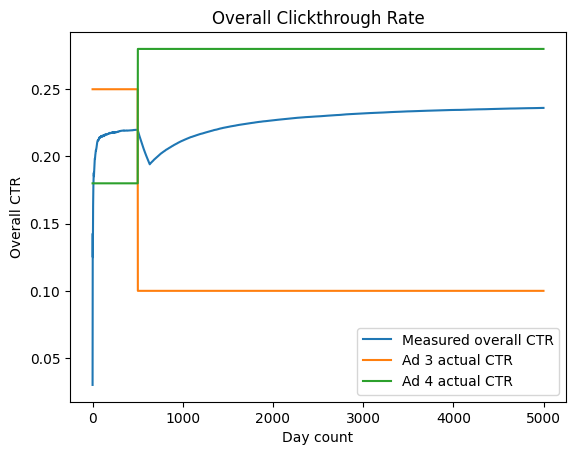

In [ ]:
#overall click through rate
plt.title('Overall Clickthrough Rate')
plt.plot(cd['Total Ads clicked till that day']/ab['Total Ads shown till that day'])
plt.plot(gh['Actual CTR Ad 3'])
plt.plot(gh['Actual CTR Ad 4'])
plt.legend(['Measured overall CTR', 'Ad 3 actual CTR', 'Ad 4 actual CTR'])
plt.xlabel('Day count')
plt.ylabel('Overall CTR')

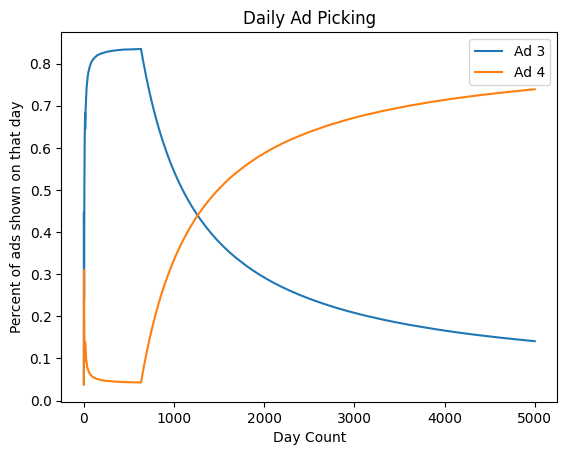

In [ ]:
# no of times most popular ad is picked up
plt.plot(ab['Ad 3 shown']/ab['Total Ads shown till that day'])
plt.plot(ab['Ad 4 shown']/ab['Total Ads shown till that day'])
plt.xlabel('Day Count')
plt.ylabel('Percent of ads shown on that day')
plt.title('Daily Ad Picking')
plt.legend(['Ad 3', 'Ad 4'])

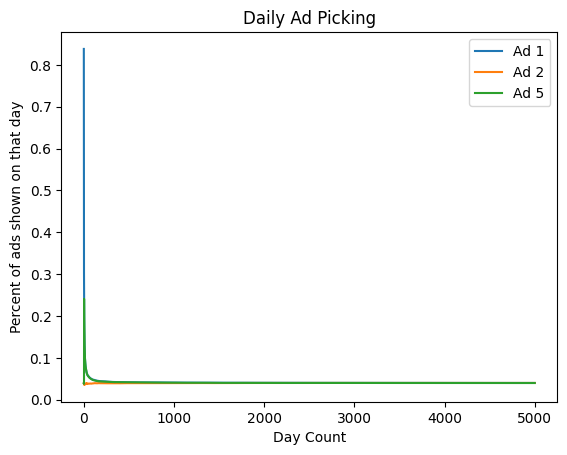

In [ ]:
# no of times other ads are picked up
plt.plot(ab['Ad 1 shown']/ab['Total Ads shown till that day'])
plt.plot(ab['Ad 2 shown']/ab['Total Ads shown till that day'])
plt.plot(ab['Ad 5 shown']/ab['Total Ads shown till that day'])
plt.xlabel('Day Count')
plt.ylabel('Percent of ads shown on that day')
plt.title('Daily Ad Picking')
plt.legend(['Ad 1', 'Ad 2', 'Ad 5'])

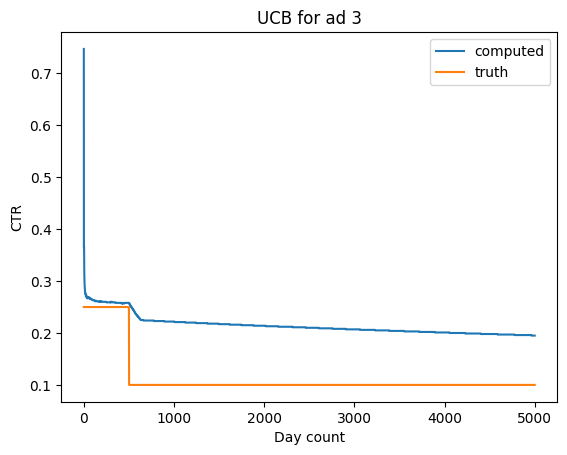

In [ ]:
plt.title('UCB for ad 3')
plt.plot(ef['UCB est for Ad 3'])
plt.plot(gh['Actual CTR Ad 3'])
plt.xlabel('Day count')
plt.ylabel('CTR')
plt.legend(['computed', 'truth'])

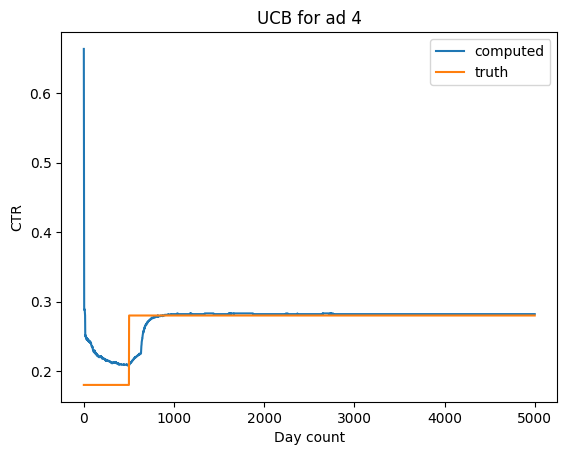

In [ ]:
plt.title('UCB for ad 4')
plt.plot(ef['UCB est for Ad 4'])
plt.plot(gh['Actual CTR Ad 4'])
plt.xlabel('Day count')
plt.ylabel('CTR')
plt.legend(['computed', 'truth'])

In [ ]:
ab.head()

,Ad 1 shown,Ad 2 shown,Ad 3 shown,Ad 4 shown,Ad 5 shown,Total Ads shown till that day
Day Count,,,,,,
0,838.0,40.0,41.0,42.0,39.0,1000.0
1,875.0,81.0,894.0,74.0,76.0,2000.0
2,911.0,115.0,924.0,929.0,121.0,3000.0
3,942.0,153.0,967.0,974.0,964.0,4000.0
4,989.0,181.0,1825.0,1017.0,988.0,5000.0


In [ ]:
ab['Ad3diff'] = ab['Ad 3 shown'].diff()
ab['Ad4diff'] = ab['Ad 4 shown'].diff()
ab['TotalDiff'] = ab['Total Ads shown till that day'].diff()

In [ ]:
ab.head()

,Ad 1 shown,Ad 2 shown,Ad 3 shown,Ad 4 shown,Ad 5 shown,Total Ads shown till that day,Ad3diff,Ad4diff,TotalDiff
Day Count,,,,,,,,,
0,838.0,40.0,41.0,42.0,39.0,1000.0,NaN,NaN,NaN
1,875.0,81.0,894.0,74.0,76.0,2000.0,853.0,32.0,1000.0
2,911.0,115.0,924.0,929.0,121.0,3000.0,30.0,855.0,1000.0
3,942.0,153.0,967.0,974.0,964.0,4000.0,43.0,45.0,1000.0
4,989.0,181.0,1825.0,1017.0,988.0,5000.0,858.0,43.0,1000.0


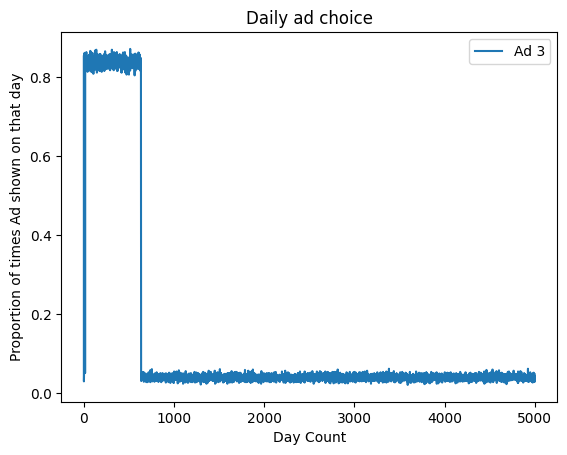

In [ ]:
plt.plot(ab['Ad3diff']/ab['TotalDiff'])
plt.xlabel('Day Count')
plt.ylabel('Proportion of times Ad shown on that day')
plt.title('Daily ad choice')
plt.legend(['Ad 3'])

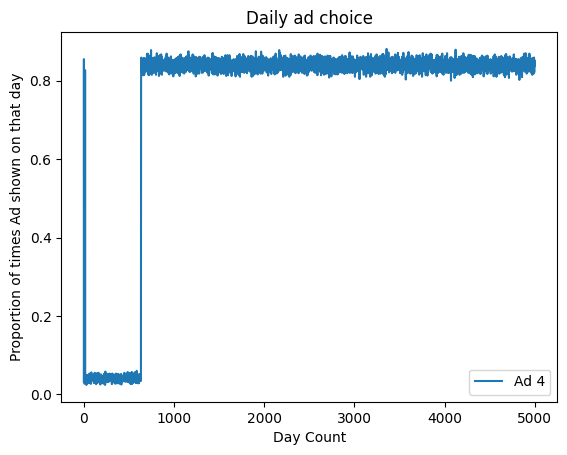

In [ ]:
plt.plot(ab['Ad4diff']/ab['TotalDiff'])
plt.xlabel('Day Count')
plt.ylabel('Proportion of times Ad shown on that day')
plt.title('Daily ad choice')
plt.legend(['Ad 4'])